In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_ta as ta

In [2]:
df = pd.read_csv('../data/train_df_with_labels.csv')

In [6]:
df.at[836, 'Target'] = 15
df.at[837, 'Target'] = 30
df.at[838, 'Target'] = -44.5
df.at[839, 'Target'] = -0.5

In [7]:
df = df[df['Abs Target']<=2]

In [12]:
df.fillna(0, inplace=True)

In [14]:
df.head(2)

,Date,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Ps_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_ANPs_psi,...,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,Target,Abs Target,Target > 2,window_start,window_duration,within_window
0,2009-10-01 01:00:00,20.543221,1.374349,55.654541,89.825334,2893.793620,116.538811,2173.762679,104.049292,1599.975952,...,3216.520127,120.276792,2442.006201,111.891938,0.0,0.0,0,0,0,0
1,2009-10-01 02:00:00,20.543221,1.315104,53.661254,89.806754,2893.791506,116.538623,2173.754085,104.050357,1599.975952,...,3216.510374,120.280932,2442.070968,111.891218,0.0,0.0,0,0,0,0


In [18]:
indices = df[df['Avg_PLT_CO2VentRate_TPH'] > 1000].index
indices

Int64Index([835, 836], dtype='int64')

In [21]:
df.loc[834, 'Avg_PLT_CO2VentRate_TPH'] = 0
df.loc[835, 'Avg_PLT_CO2VentRate_TPH'] = 0
df.loc[836, 'Avg_PLT_CO2VentRate_TPH'] = 0

<AxesSubplot:>

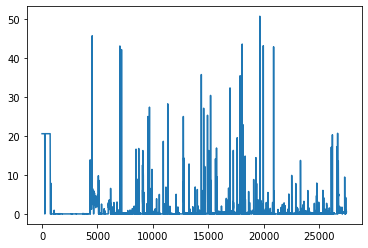

In [24]:
df['Avg_PLT_CO2VentRate_TPH'].plot()

In [30]:
df.fillna(0, inplace=True)

In [36]:
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
27458,0.018985,0.008271,0.010714
27459,0.026439,0.012580,0.013859
27460,0.035967,0.017686,0.018281
27461,0.042692,0.019529,0.023163


In [43]:
for col in features:
    df['Abs '+col] = np.abs(col)
    df['Log abs '+col] = np.log(np.abs(col)+1e-7)

SyntaxError: incomplete input (2727907920.py, line 1)

In [45]:
np.log(1000)

6.907755278982137

In [50]:
# for col in features:
col = 'Avg_PLT_CO2VentRate_TPH'

# Add trend indicators
df[col+' ema 5'] = ta.ema(df[col], length=5)
df[col+' ema 10'] = ta.ema(df[col], length=10)
df[col+' sma 5'] = ta.sma(df[col], length=5)
df[col+' sma 10'] = ta.sma(df[col], length=10)

for f,s,sig in [(12,26,9), (24,52,9)]:
# f = 12
# s = 26
# sig = 9
    macd = ta.macd(df[col], fast=f, slow=s, signal=sig)

    df[f'{col} MACD_{f}_{s}_{sig}'] = macd[f'MACD_{f}_{s}_{sig}']
    df[f'{col} MACD_Signal_{f}_{s}_{sig}'] = macd[f'MACDs_{f}_{s}_{sig}']
    df[f'{col} MACD_Histogram_{f}_{s}_{sig}'] = macd[f'MACDh_{f}_{s}_{sig}']

In [51]:
df.columns

Index(['Date', 'Avg_PLT_CO2VentRate_TPH', 'Avg_CCS1_WHCO2InjPs_psi',
       'Avg_CCS1_WHCO2InjTp_F', 'Avg_CCS1_ANPs_psi', 'Avg_CCS1_DH6325Ps_psi',
       'Avg_CCS1_DH6325Tp_F', 'Avg_VW1_WBTbgPs_psi', 'Avg_VW1_WBTbgTp_F',
       'Avg_VW1_ANPs_psi', 'Avg_VW1_Z11D4917Ps_psi', 'Avg_VW1_Z11D4917Tp_F',
       'Avg_VW1_Z10D5001Ps_psi', 'Avg_VW1_Z10D5001Tp_F',
       'Avg_VW1_Z09D5653Ps_psi', 'Avg_VW1_Z09D5653Tp_F',
       'Avg_VW1_Z08D5840Ps_psi', 'Avg_VW1_Z08D5840Tp_F',
       'Avg_VW1_Z07D6416Ps_psi', 'Avg_VW1_Z07D6416Tp_F',
       'Avg_VW1_Z06D6632Ps_psi', 'Avg_VW1_Z06D6632Tp_F',
       'Avg_VW1_Z05D6720Ps_psi', 'Avg_VW1_Z05D6720Tp_F',
       'Avg_VW1_Z04D6837Ps_psi', 'Avg_VW1_Z04D6837Tp_F',
       'Avg_VW1_Z03D6945Ps_psi', 'Avg_VW1_Z03D6945Tp_F',
       'Avg_VW1_Z02D6982Ps_psi', 'Avg_VW1_Z02D6982Tp_F',
       'Avg_VW1_Z01D7061Ps_psi', 'Avg_VW1_Z01D7061Tp_F',
       'Avg_VW1_Z0910D5482Ps_psi', 'Avg_VW1_Z0910D5482Tp_F', 'Target',
       'Abs Target', 'Target > 2', 'window_start', 'window_du

<AxesSubplot:>

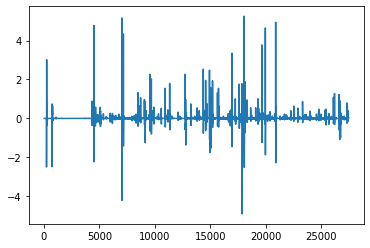

In [49]:
df['Avg_PLT_CO2VentRate_TPH MACD_Histogram_12_26_9'].plot()

In [3]:
df = df[df['Abs Target']<=2]

In [12]:
df.fillna(0, inplace=True)

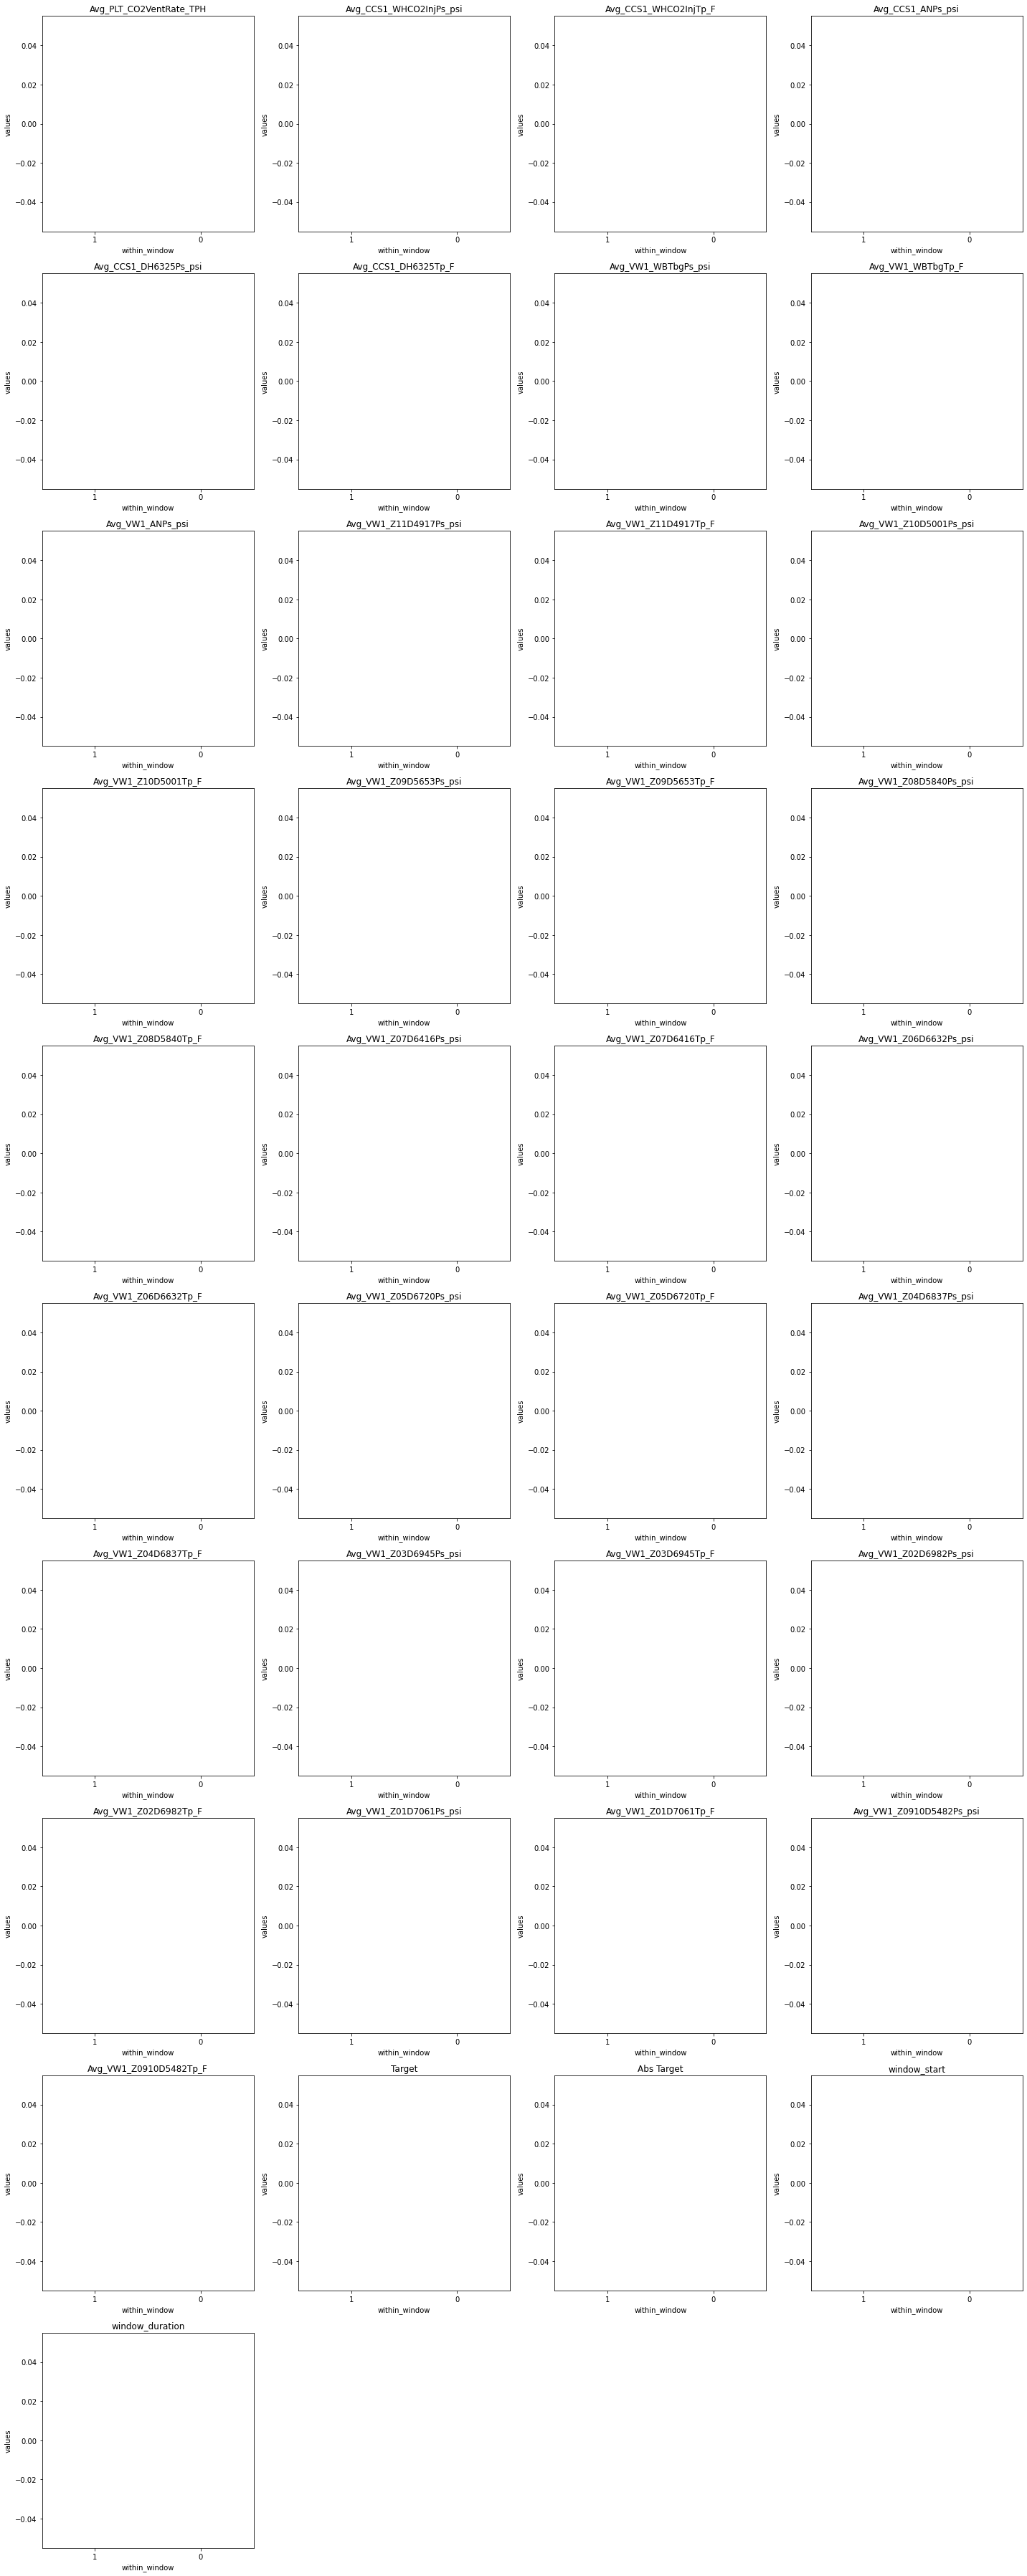

In [14]:
# Filter rows based on 'within_window' values
df_within_window_1 = df[df['within_window'] == 1].replace(0, np.nan)
df_within_window_0 = df[df['within_window'] == 0].replace(0, np.nan)

# Calculate the number of subplots and their arrangement
num_columns = len(df.columns) - 1  # Exclude 'within_window' column
num_rows = int(np.ceil(num_columns / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Plot the boxplots for each column
for i, col in enumerate(df.drop('within_window', axis=1).columns):
    ax = axes.flatten()[i]
    ax.boxplot([df_within_window_1[col], df_within_window_0[col]], labels=['1', '0'])
    ax.set_title(col)
    ax.set_xlabel('within_window')
    ax.set_ylabel('values')

# Remove empty subplots
for i in range(num_columns, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Tighten the layout
fig.tight_layout()

# Show the plot
plt.show()

In [8]:
df.drop(['Date'], axis=1, inplace=True)